In [45]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib notebook

In [180]:
def plot_2d_parallels(traj, label_t1, traj_gt, label_t2):
    mpl.rcParams['legend.fontsize'] = 10
    
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.set_title(label_t1)
    ax.plot(traj[:, 0], traj[:, 1], label=label_t1)
    
    ax = fig.add_subplot(122)
    ax.set_title(label_t2)
    ax.plot(traj_gt[:, 0], traj_gt[:, 1], label=label_t2)

    plt.show()
    
def plot_2d(traj, label_t1, traj_gt=None, label_t2=""):
    mpl.rcParams['legend.fontsize'] = 10
    
    fig = plt.figure()

    plt.plot(traj[:, 0], traj[:, 1], label=label_t1)
    if traj_gt is not None:
        plt.plot(traj_gt[:, 0], traj_gt[:, 1], label=label_t2)
    plt.legend()

    plt.show()

def plot_3d(traj, traj_gt=None):
    mpl.rcParams['legend.fontsize'] = 10

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], label='SDSLAM')
    if traj_gt is not None:
        ax.plot(traj_gt[:, 0], traj_gt[:, 1], traj_gt[:, 2], label='GT')
    ax.legend()

    plt.show()

def plot_2d_realtime(traj, speed=30):
    mpl.rcParams['legend.fontsize'] = 10
  
    lims = (min(traj[:, 0]) -1, max(traj[:, 0]) +1,
            min(traj[:, 1]) -1, max(traj[:, 1]) +1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    fig.show()
    fig.canvas.draw()
    
    
    for i in np.arange(0, traj.shape[0], speed):
        ax.clear()
        ax.set_xlim(left=lims[0], right=lims[1])
        ax.set_ylim(top=lims[3], bottom=lims[2])
        ax.plot(traj[:i, 0], traj[:i, 1])
        fig.canvas.draw()


---

In [166]:
GT_FILE = './gt_V1_02.csv'
FUSION_FILE = './fusion_V1_02.csv'
MONOCULAR_FILE = './mono_V1_02.csv'

In [168]:
gt_raw = np.genfromtxt(GT_FILE, delimiter=',')
fusion_raw = np.genfromtxt(FUSION_FILE, delimiter=',')
mono_raw = np.genfromtxt(MONOCULAR_FILE, delimiter=',')
print(gt_raw.shape, fusion_raw.shape, mono_raw.shape)

(16702, 17) (1553, 8) (1704, 8)


In [170]:
traj_2d_gt = gt_raw[:, 1:3]
traj_2d_fusion = fusion_raw[:, 1:3]
traj_2d_mono = mono_raw[:, 1:3]

<IPython.core.display.Javascript object>


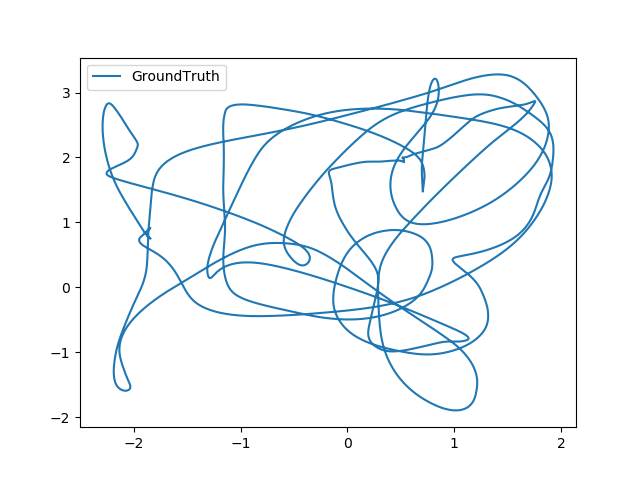

In [174]:
plot_2d(traj_2d_gt, "GroundTruth")

<IPython.core.display.Javascript object>


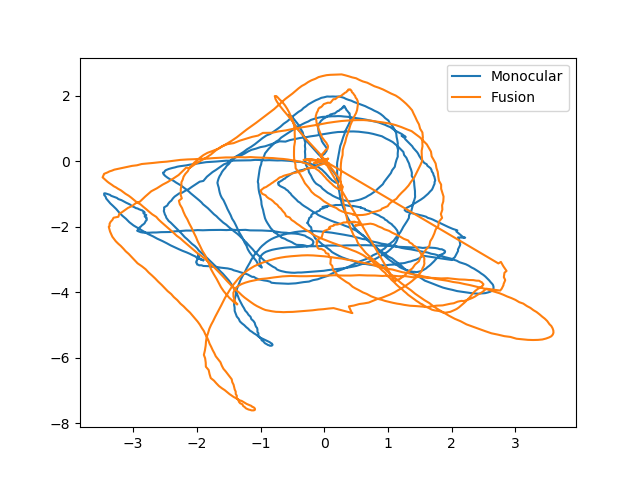

<IPython.core.display.Javascript object>


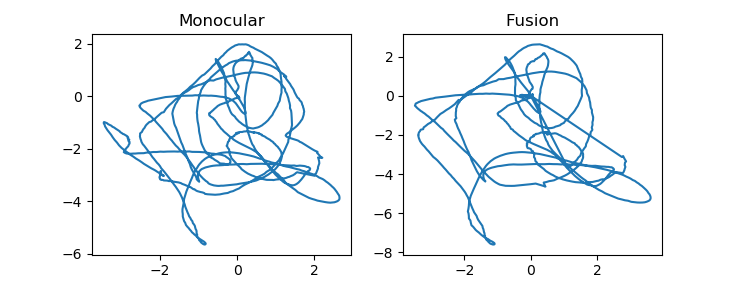

In [185]:
plot_2d(traj_2d_mono, "Monocular", traj_2d_fusion, "Fusion")
plot_2d_parallels(traj_2d_mono, "Monocular", traj_2d_fusion, "Fusion")

<IPython.core.display.Javascript object>


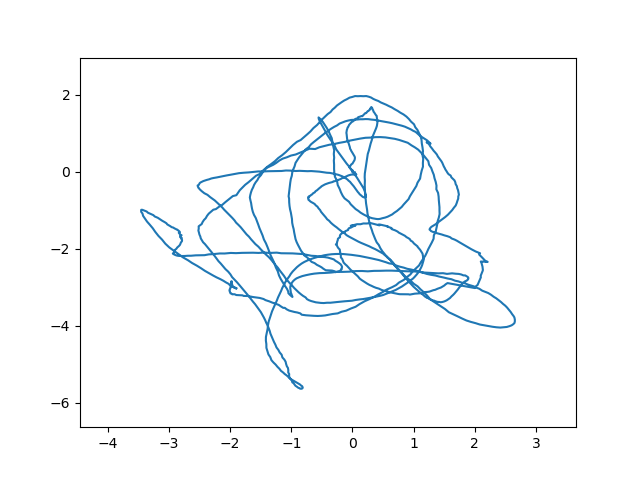

In [184]:
plot_2d_realtime(traj_2d_mono, 1)

---


<IPython.core.display.Javascript object>


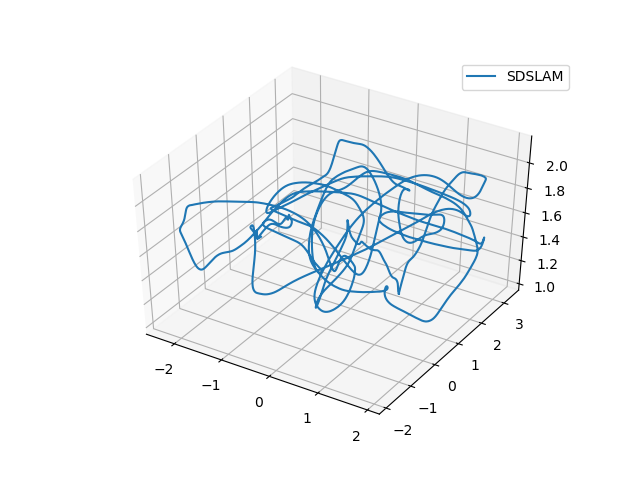

In [183]:

plot_3d(gt_raw[:, 1:4])